In [16]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [4]:
bos=pd.DataFrame(boston.data)

In [5]:
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
boston.data.shape

(506, 13)

In [10]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [11]:
bos.columns=boston.feature_names

In [12]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:
boston.target[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [14]:
bos['PRICE']=boston.target

In [15]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [18]:
X=bos.drop('PRICE',axis=1)
lm=LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
lm.fit(X,bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
print("Estimated Intercept Coefficiants",lm.intercept_)

Estimated Intercept Coefficiants 36.49110328036111


In [23]:
print("No Of  Coefficiants",lm.coef_)

No Of  Coefficiants [-1.07170557e-01  4.63952195e-02  2.08602395e-02  2.68856140e+00
 -1.77957587e+01  3.80475246e+00  7.51061703e-04 -1.47575880e+00
  3.05655038e-01 -1.23293463e-02 -9.53463555e-01  9.39251272e-03
 -5.25466633e-01]


In [29]:
pd.DataFrame(list(zip(X.columns, lm.coef_ )), columns=['features','estimatedCoefficients'])

,features,estimatedCoefficients
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


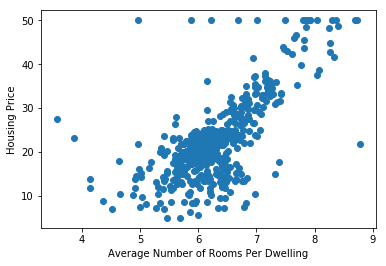

In [33]:
plt.scatter(bos.RM,bos.PRICE)
plt.xlabel("Average Number of Rooms Per Dwelling")
plt.ylabel("Housing Price")
plt.show()

In [36]:
lm.predict(X)[:5]

array([30.00821269, 25.0298606 , 30.5702317 , 28.60814055, 27.94288232])

Text(0.5,1,'Price Vs predicted price')

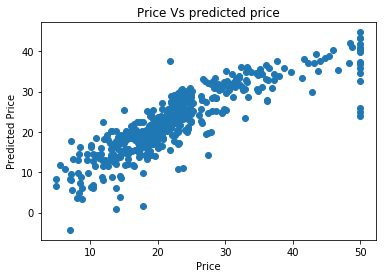

In [43]:
plt.scatter(bos.PRICE,lm.predict(X))
plt.xlabel("Price")
plt.ylabel("Predicted Price")
plt.title("Price Vs predicted price")

In [52]:
X_train,X_test,Y_train,Y_test=sklearn.model_selection.train_test_split(X,bos.PRICE,test_size=0.30,random_state=5)

In [54]:
lm=LinearRegression()
lm.fit(X_train,Y_train)
predTrain=lm.predict(X_train)
predTest=lm.predict(X_test)

In [58]:
print ('Fit a model X_train, and calculate MSE with Y_train:', np.mean((Y_train-lm.predict(X_train)) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 19.071527965850695


In [60]:
print ('Fit a model X_train, and calculate MSE with X_test, Y_test:', np.mean((Y_test-lm.predict(X_test)) ** 2))

Fit a model X_train, and calculate MSE with X_test, Y_test: 30.703232207218882


Text(0,0.5,'Residuals')

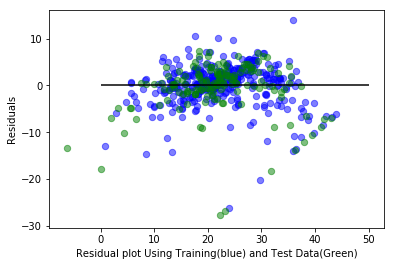

In [71]:
plt.scatter(lm.predict(X_train),lm.predict(X_train)- Y_train, c='b', s=40, alpha=0.5)
plt.scatter(lm.predict(X_test),lm.predict(X_test) - Y_test, c='g', s=40, alpha=0.5)
plt.hlines(y=0,xmin=0,xmax=50)
plt.xlabel('Residual plot Using Training(blue) and Test Data(Green)')
plt.ylabel('Residuals')